Rating yelp reviews using NLP

import libraries and data

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

yelp = pd.read_csv('yelp.csv')

Data Analysis

In [ ]:
yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0


In [ ]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [ ]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [ ]:
yelp['text length'] = yelp['text'].apply(len)

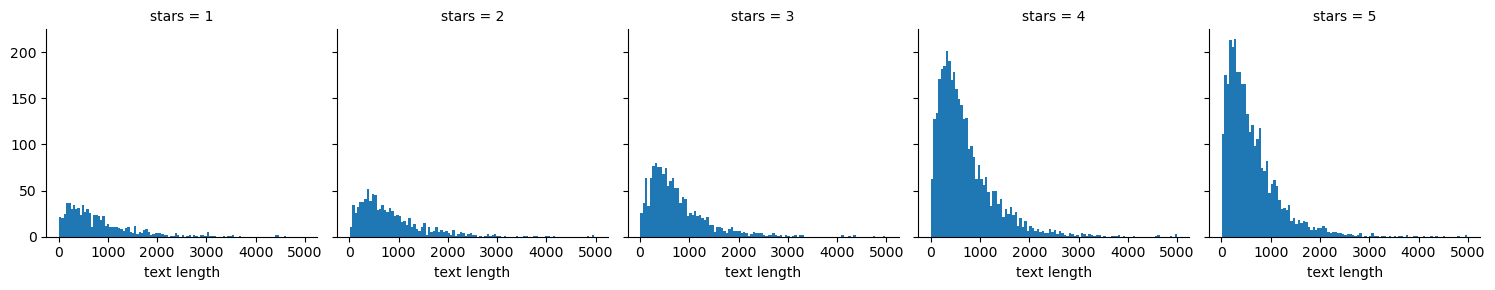

In [ ]:
g = sns.FacetGrid(yelp, col = 'stars')
g.map(plt.hist, 'text length', bins = 100)

<Axes: xlabel='stars', ylabel='text length'>

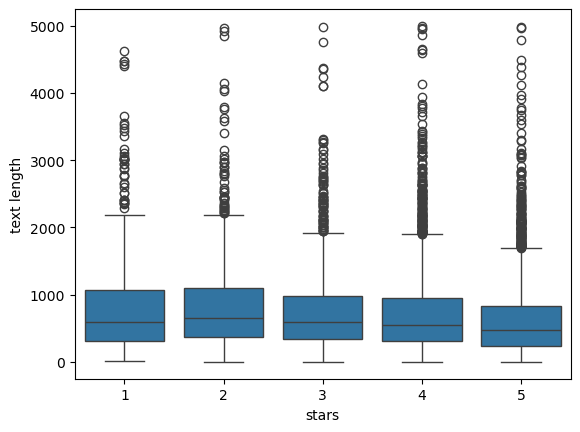

In [ ]:
sns.boxplot(x='stars', y='text length', data=yelp)

<Axes: xlabel='stars', ylabel='count'>

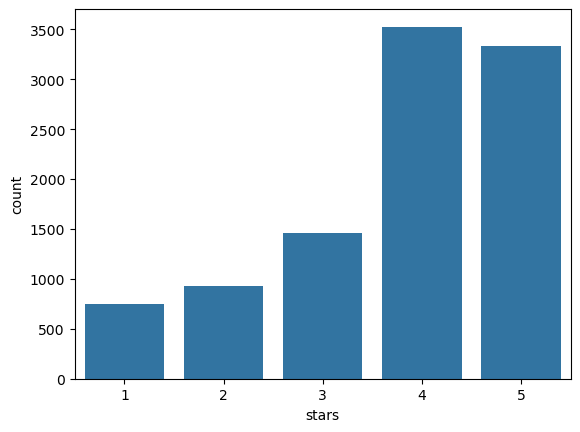

In [ ]:
sns.countplot(x='stars', data=yelp)

In [ ]:
print(yelp['stars'].dtype)

non_numeric_rows = yelp[~pd.to_numeric(yelp['stars'], errors='coerce').notnull()]
print(non_numeric_rows)

yelp['stars'] = pd.to_numeric(yelp['stars'], errors='coerce')
yelp = yelp.dropna(subset=['stars'])

int64
Empty DataFrame
Columns: [business_id, date, review_id, stars, text, type, user_id, cool, useful, funny, text length]
Index: []


In [ ]:
columns_to_group = ['cool', 'useful', 'funny', 'text length']
filtered_data = yelp[columns_to_group].copy()

filtered_data['stars'] = yelp['stars']

stars = filtered_data.groupby('stars')[columns_to_group].mean()

stars

,cool,useful,funny,text length
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [ ]:
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

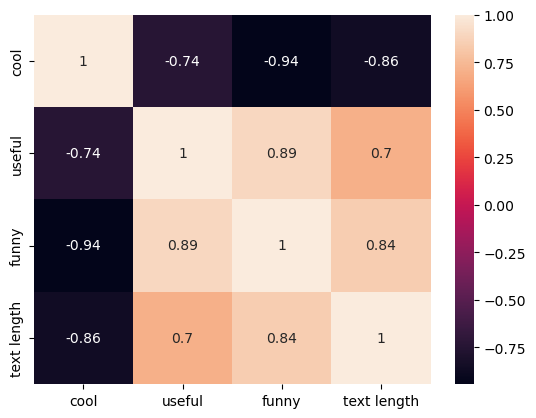

In [ ]:
sns.heatmap(stars.corr(), annot=True)

NLP classification task

In [ ]:
yelp_class = yelp[(yelp['stars']==1) | (yelp['stars']==5)]
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [ ]:
X = yelp_class['text']
y = yelp_class['stars']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Missing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {pd.isnull(y).sum()}")
print((X.index == y.index).all())

X shape: (4086,)
y shape: (4086,)
Missing values in X: 0
Missing values in y: 0
True


train test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3268,)
X_test shape: (818,)
y_train shape: (3268,)
y_test shape: (818,)


training data using pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([('cv', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('nb', MultinomialNB())])

pipe.fit(X_train, y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('nb', MultinomialNB())])

Predictions and evaluations

In [ ]:
predictions = pipe.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[  1 166]
 [  0 651]]


              precision    recall  f1-score   support

           1       1.00      0.01      0.01       167
           5       0.80      1.00      0.89       651

    accuracy                           0.80       818
   macro avg       0.90      0.50      0.45       818
weighted avg       0.84      0.80      0.71       818



modeling without the tfidf transformer

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (3268, 19183)
X_test shape: (818, 19183)
y_train shape: (3268,)
y_test shape: (818,)


In [ ]:
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predictions = nb.predict(X_test)

print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[114  36]
 [ 18 650]]


              precision    recall  f1-score   support

           1       0.86      0.76      0.81       150
           5       0.95      0.97      0.96       668

    accuracy                           0.93       818
   macro avg       0.91      0.87      0.88       818
weighted avg       0.93      0.93      0.93       818

